# TP 0 : Introduction à la transformée de Fourier 2D
---
## Représentation des signaux & problèmes inverses - G1-G2
---

Ce TP aborde l'utilisation de la transformée de Fourier (TF) 2D à l'aide du langage de programmation Python.

## Avant de commencer...
Lisez attentivement les instructions ci-dessous avant de commencer ce TP.

* Copiez l'archive `.zip` dans un dossier local (Computer -> Documents\TDS\) ou sur votre espace serveur.
* Extraire le contenu de l'archive `.zip`.
* Renommez le dossier `TP0_Name1_Name2`.
* Copiez le fichier notebook fourni, et renommez-le comme sui: `TP0_Name1_Name2.ipynb`.

## Sommaire <a name="content"></a>

* [Question 1](#question1)
* [Question 2](#question2)
* [Question 3](#question3)
* [Exercice 1](#exo1)
* [Exercice 2](#exo2)

---
## Analyse de Fourier d'une image

### Configuration : (à faire avant de commencer)

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg
import numpy as np

### Chargement de la première image

In [2]:
filename='img/chessboard.png'
I=mpimg.imread(filename) 

plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'img/chessboard.png'

Affichage de la transformée de Fourier.

**Remarque :** la fonction `fftshift` réordonne les coefficients de
sorte que la fréquence (0, 0) se trouve au centre, soit ici à la position (256, 256). 

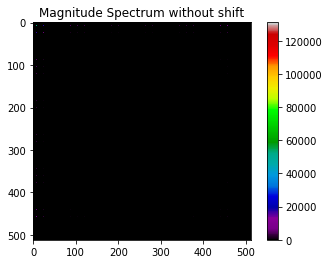

In [28]:
fft2_img= np.fft.fft2(I)
fft2_img_shift = np.fft.fftshift(fft2_img)

plt.figure()
plt.imshow(np.abs(fft2_img), cmap = 'nipy_spectral') #cmap = 'nipy_spectral'
plt.title('Magnitude Spectrum without shift')
plt.colorbar()
plt.show()

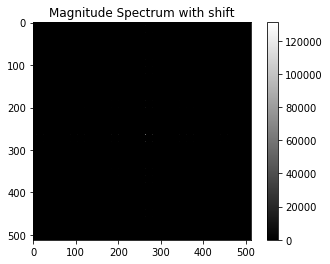

In [29]:
plt.figure()
plt.imshow(np.abs(fft2_img_shift), cmap = 'gray') 
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

----
### Question 1 <a name="question1"></a> [[sommaire]](#content)
Que remarquez-vous quant à la repsésentation obtenue ci-dessus ? Cette représentation est-elle pertinente ? Comment l'améliorer ?

Indication : vous pouvez éventuellement zommer sur le centre de la figure. Que voyez-vous apparaître ?

Dans la première représentation, on observe un spectre entièrement noir. La fréquence (0,0) n'est pas observable, la représentation n'est donc pas pertinente. En revanche, dans la deuxième représentation, on remarque la fréquence (0,0) au centre de l'image, représentée par un point blanc. Toute l'énergie du signal y est concentrée.

---
*Pour améliorer le contraste, on passe en représentation logarithmique:* `norm=mpl.colors.LogNorm()`

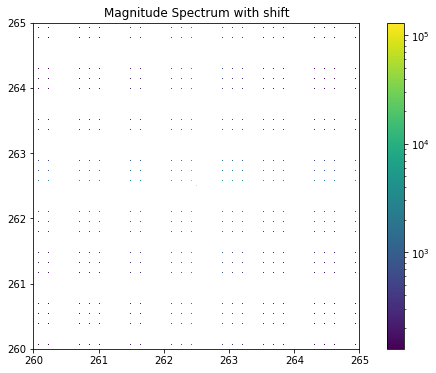

In [30]:
plt.figure(figsize=(10,6))
plt.imshow(np.abs(fft2_img_shift), extent= [260, 265, 260, 265], cmap = 'viridis', norm=mpl.colors.LogNorm()) #cmap = 'nipy_spectral'
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

----
### Question 2 <a name="question2"></a> [[sommaire]](#content)
2.1 Consultez la liste des images disponibles dans le dossier **img**.

2.2 Observez les transformées de Fourier de plusieurs d'entre elles. Que remarquez-vous ?

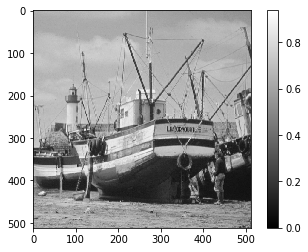

In [76]:
filename='img/boat.png'
I=mpimg.imread(filename) 
I=I.mean(axis=2)

plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

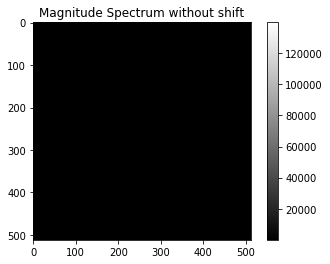

In [77]:
fft2_img= np.fft.fft2(I)
fft2_img_shift = np.fft.fftshift(fft2_img)

plt.figure()
plt.imshow(np.abs(fft2_img), cmap = 'gray') #cmap = 'nipy_spectral'
plt.title('Magnitude Spectrum without shift')
plt.colorbar()
plt.show()

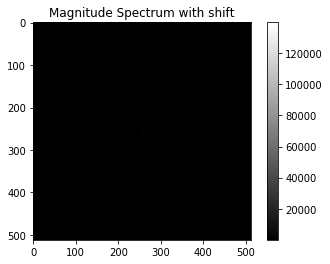

In [78]:
plt.figure()
plt.imshow(np.abs(fft2_img_shift), cmap = 'gray') 
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

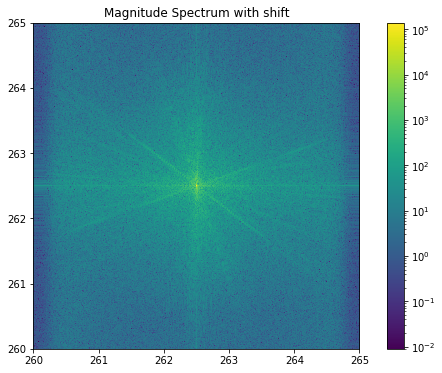

In [79]:
plt.figure(figsize=(10,6))
plt.imshow(np.abs(fft2_img_shift), extent= [260, 265, 260, 265], cmap = 'viridis', norm=mpl.colors.LogNorm()) #cmap = 'nipy_spectral'
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

On remarque que l'énergie de l'image est beaucoup plus éparse et moins structurée que pour le damier. L'énergie reste très concentrée au centre de l'image avec la fonction shift.

In [80]:
# votre code (illustration des commentaires)

----
### Question 3 <a name="question3"></a> [[sommaire]](#content)
3.1 Comparez la tranformée de Fourier des images I et `J = I - np.mean(img)` (J étant de moyenne nulle). 

3.2 Etudiez notamment ce qui se passe à la fréquence (0, 0).

Sur l'image J (après avoir soustrait la moyenne de l'image de base), on remarque que l'image est plus sombre. En représentation logarithmique, on voit que l'énergie est moins importante pour l'image J. Pour l'image "boat", on passe d'une amplitude maximale de l'ordre de 10^5 à 10^4. Au centre de l'image, on voit un point noir, ce qui correspond en représentation log à moins l'infini, c'est-à-dire une amplitude de 0, ce qui est logique car nous avons soustrait la moyenne.

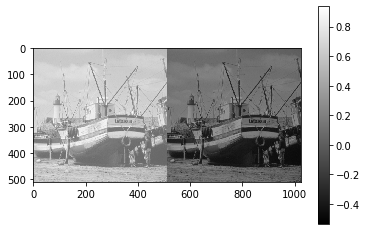

In [81]:
filename='img/boat.png'
I=mpimg.imread(filename) 
I=I.mean(axis=2)

J = I - np.mean(I)
K = np.concatenate((I, J), axis=1)

plt.figure()
plt.imshow(K, cmap='gray')
plt.colorbar()
plt.show()

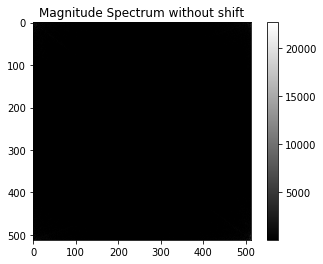

In [82]:
fft2_img= np.fft.fft2(J)
fft2_img_shift = np.fft.fftshift(fft2_img)

plt.figure()
plt.imshow(np.abs(fft2_img), cmap = 'gray') #cmap = 'nipy_spectral'
plt.title('Magnitude Spectrum without shift')
plt.colorbar()
plt.show()

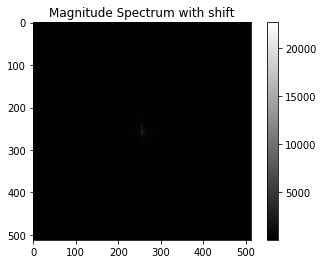

In [83]:
plt.figure()
plt.imshow(np.abs(fft2_img_shift), cmap = 'gray') 
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

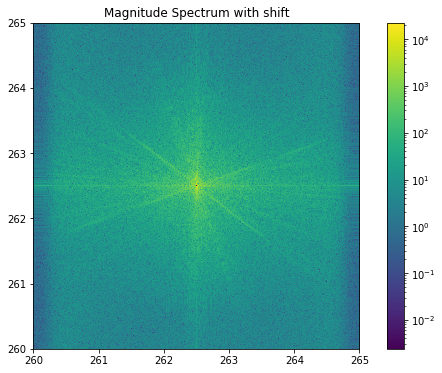

In [84]:
plt.figure(figsize=(10,6))
plt.imshow(np.abs(fft2_img_shift), extent= [260, 265, 260, 265], cmap = 'viridis', norm=mpl.colors.LogNorm()) #cmap = 'nipy_spectral'
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

----
### Exercice 1 <a name="exo1"></a> [[sommaire]](#content)
1. Que représente le point clair au centre de la représentation de la transformée de Fourier 2D ? (lorsqu'il existe)
2. Vérifiez que l'application successive de 2 transformations de Fourier 1D successives (verticale puis horizontale par exemple) est équivalente à l'application d'une transformation 2D directement (voir indications ci-dessous).
3. Refaites le même travail pour différentes images et commentez les résultats obtenus. 
4. Construisez une image constituée de rayures noires et blanches, et étudiez sa transformée de Fourier. Faites varier la taille des rayures.
5. Construisez une matrice de taille $512 \times 512$ ne contenant que des `zeros` (utiliser la fonction zeros) sauf en 2 points symétriques par rapport au centre de la matrice où on affectera la valeur 1. Considérer cette matrice comme la transformée de Fourier d'une image et étudier sa transformée inverse par `ifft2` (Attention : penser à `ifftshift` !). Observez et commentez.

1. Le point clair au centre de la représentation représente une concentration élevée d'énergie.
2. Voir le code ci-dessous. En affichant la différence J1[0:5]-J2[0:5], on obtient bien une matrice dont les coefficients valent 0 ou sont très proches de 0.
3. En faisant le même traitement sur d'autres images, nous pouvons confirmer notre conjecture. Les coefficients non nuls sont de l'ordre de 10^-4 pour les plus élevés.
4. La transformée de Fourier en représentation logarithmique est un ensemble de points horizontaux. En augmentant la taille des rayures, on voit que les points d'énergies sont plus nombreux et plus rapprochés.
5. Avec peu de rayures, dans la question 4, nous avions une multitude de points dans la transformée de Fourier. Donc dans cette question, avec seulement 2 points, il est logique d'obtenir une image avec de nombreuses rayures en appliquant la transformée inverse.


_Indication pour la question 2_

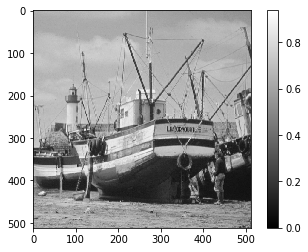

In [87]:
filename='img/boat.png'
I=mpimg.imread(filename) 
I=I.mean(axis=2)

plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

In [89]:
# Pour utiliser 2 transformées unidimensionnelles successives:
J1 = np.fft.fft(I, n=None, axis=-1, norm=None)   # FFT 1D verticale
J1 = np.fft.fft(J1, n=None, axis=-2, norm=None)   # FFT 1D horizontale
                
# En utilisant 1 transformée bidimensionnelle directement:

# J2 = # à compléter...

J2=np.fft.fft2(I)

# On comparera les valeurs obtenues en regardant par exemple la différence J1[0:5]-J2[0:5]

J=J1[0:5]-J2[0:5]
print (J)

[[ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  0.0000000e+00-1.2207031e-04j
  -1.2207031e-04+1.2207031e-04j  0.0000000e+00+0.0000000e+00j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  1.9073486e-06+0.0000000e+00j
  -6.1035156e-05-1.2207031e-04j  0.0000000e+00+0.0000000e+00j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  0.0000000e+00-7.6293945e-06j
   0.0000000e+00+3.0517578e-05j  0.0000000e+00+0.0000000e+00j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  0.0000000e+00-7.6293945e-06j
   6.1035156e-05+0.0000000e+00j  0.0000000e+00-1.5258789e-05j]]


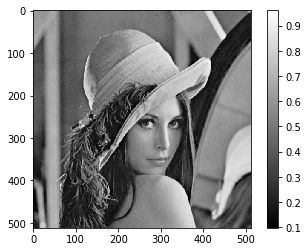

In [90]:
filename='img/lena.png'
I=mpimg.imread(filename) 
I=I.mean(axis=2)

plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

In [91]:
# Pour utiliser 2 transformées unidimensionnelles successives:
J1 = np.fft.fft(I, n=None, axis=-1, norm=None)   # FFT 1D verticale
J1 = np.fft.fft(J1, n=None, axis=-2, norm=None)   # FFT 1D horizontale
                
# En utilisant 1 transformée bidimensionnelle directement:

# J2 = # à compléter...

J2=np.fft.fft2(I)

# On comparera les valeurs obtenues en regardant par exemple la différence J1[0:5]-J2[0:5]

J=J1[0:5]-J2[0:5]
print (J)

[[ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  0.0000000e+00+0.0000000e+00j
  -1.2207031e-04+0.0000000e+00j -1.5258789e-05+0.0000000e+00j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  0.0000000e+00+0.0000000e+00j
   0.0000000e+00-6.1035156e-05j  0.0000000e+00-1.5258789e-05j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  7.6293945e-06+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j  0.0000000e+00-2.4414062e-04j]
 [ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
   0.0000000e+00+0.0000000e+00j ...  0.0000000e+00+6.1035156e-05j
   1.5258789e-05-1.2207031e-04j  0.0000000e+00+1.5258789e-05j]]


_Indication pour la question 4_

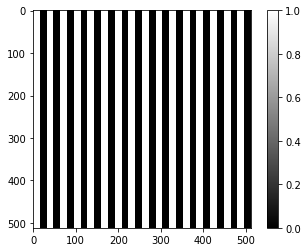

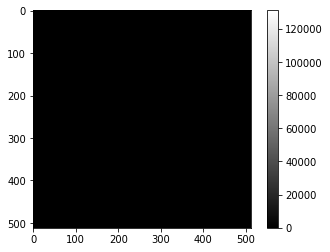

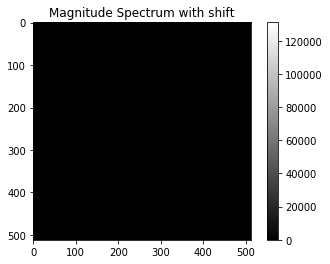

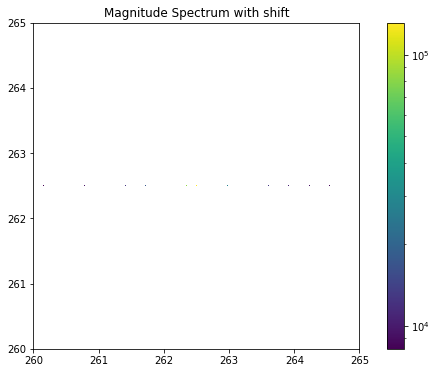

In [95]:
# Indication pour la question 4 et construire des rayures verticales de largeur 16 :
A = np.concatenate((np.ones([512,16]), np.zeros([512,16])), axis=1)
I = np.tile(A,(1,16))
J=np.fft.fft2(I)
J1 = np.fft.fftshift(J)

plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(np.abs(J), cmap = 'gray') #cmap = 'nipy_spectral'
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(np.abs(J1), cmap = 'gray') 
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,6))
plt.imshow(np.abs(J1), extent= [260, 265, 260, 265], cmap = 'viridis', norm=mpl.colors.LogNorm()) #cmap = 'nipy_spectral'
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

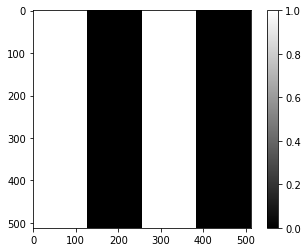

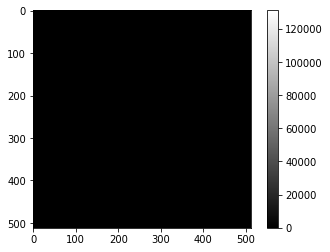

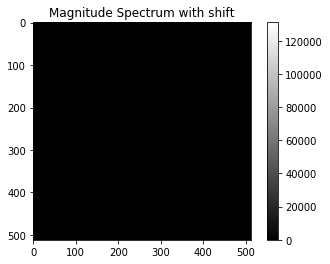

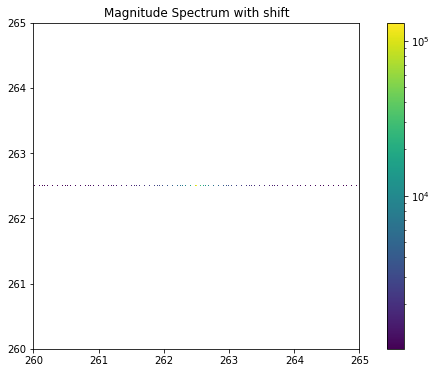

In [100]:
A = np.concatenate((np.ones([512,128]), np.zeros([512,128])), axis=1)
I = np.tile(A,(1,2))
J=np.fft.fft2(I)
J1 = np.fft.fftshift(J)

plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(np.abs(J), cmap = 'gray') #cmap = 'nipy_spectral'
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(np.abs(J1), cmap = 'gray') 
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,6))
plt.imshow(np.abs(J1), extent= [260, 265, 260, 265], cmap = 'viridis', norm=mpl.colors.LogNorm()) #cmap = 'nipy_spectral'
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


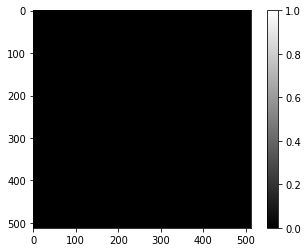

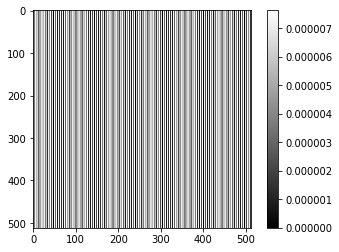

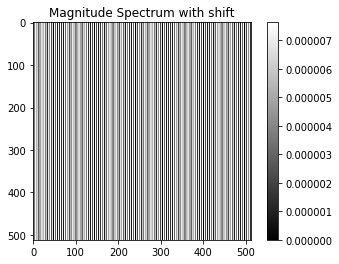

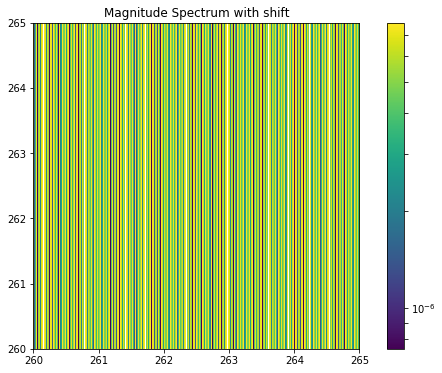

In [7]:
I=np.zeros([512,512])
print(I)
I[256][200]=1
I[256][312]=1

J=np.fft.ifft2(I)
J=np.real(J)
J1=np.fft.ifftshift(J)

plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(np.abs(J), cmap = 'gray') #cmap = 'nipy_spectral'
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(np.abs(J1), cmap = 'gray') 
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,6))
plt.imshow(np.abs(J1), extent= [260, 265, 260, 265], cmap = 'viridis', norm=mpl.colors.LogNorm()) #cmap = 'nipy_spectral'
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()


_Indication pour la question 5 : le centre de fréquence spatiale (0, 0) est en (256, 256)._

----
### Exercice 2 <a name="exo2"></a> [[sommaire]](#content)
On définit 2 masques h1 et h2 dans le domaine de Fourier :

In [4]:
h1=np.zeros([512,512])
delta=32;
h1[256-delta:256+delta , 256-delta:256+delta]=1;
h2=1-h1;

1. Reconstruire les images J1 et J2 filtrées comme transformées de Fourier inverses de `h1*TF_I` et `h2*TF_I`. 

2. Quel type d'opération a-t-on effectué ? 

3. Observer le résultat sur l'image `mandrill` par exemple et commenter.

1. cf code ci-dessous
2. Pour l'image J1, on a gardé l'information de l'image de base autour de la moyenne. On a donc une idée de la forme générale de l'image d'origine. En revanche, pour J2, on a supprimé l'information autour de la moyenne. On a alors uniquement les valeurs éloignées de la moyenne, qui caractérisent la texture de l'image. On a appliqué un filtre à l'image.

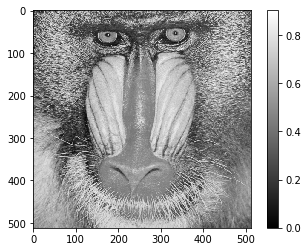

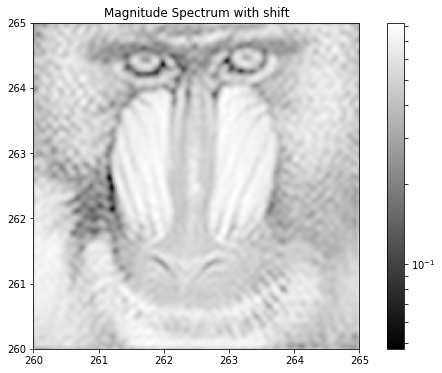

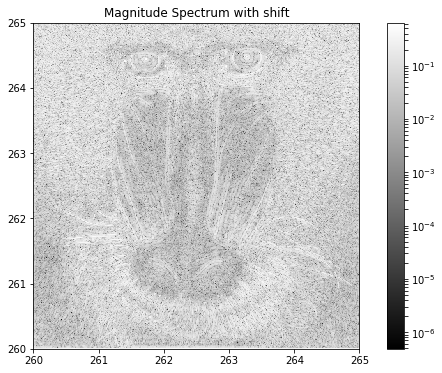

In [16]:
filename='img/mandrill.png'
I=mpimg.imread(filename) 
I=I.mean(axis=2)

J=np.fft.fft2(I)
J=np.fft.fftshift(J)
J1=np.fft.ifft2(h1*J)
J1=np.real(J1)
J2=np.fft.ifft2(h2*J)
J2=np.real(J2)

plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,6))
plt.imshow(np.abs(J1), extent= [260, 265, 260, 265], cmap = 'gray', norm=mpl.colors.LogNorm()) #cmap = 'nipy_spectral'
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,6))
plt.imshow(np.abs(J2), extent= [260, 265, 260, 265], cmap = 'gray', norm=mpl.colors.LogNorm()) #cmap = 'nipy_spectral'
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

---
### Question subsidiaire [[sommaire]](#content)

Proposer une version isotrope du filtre passe-bas (passe-haut) ci-dessus. Ceci revient à remplacer le filtre de gabarit carré par un gabarit circulaire de rayon `fc` (la fréquence de coupure).

*Votre réponse (commentaire des résultats)*

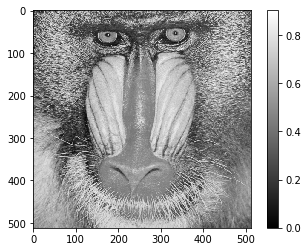

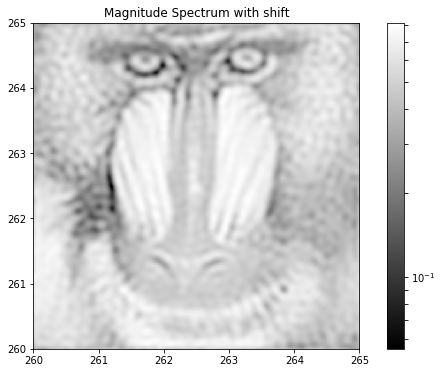

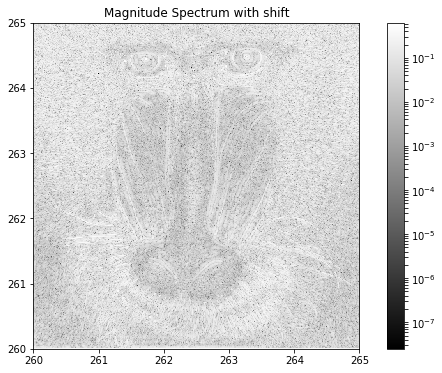

In [19]:
h1=np.zeros([512,512])
fc=32;
for i in range (512):
    for j in range (512):
        if np.sqrt((256-j)**2+(256-i)**2)<=fc :
            h1[i,j]=1;
h2=1-h1;

filename='img/mandrill.png'
I=mpimg.imread(filename) 
I=I.mean(axis=2)

J=np.fft.fft2(I)
J=np.fft.fftshift(J)
J1=np.fft.ifft2(h1*J)
J1=np.real(J1)
J2=np.fft.ifft2(h2*J)
J2=np.real(J2)

plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,6))
plt.imshow(np.abs(J1), extent= [260, 265, 260, 265], cmap = 'gray', norm=mpl.colors.LogNorm()) #cmap = 'nipy_spectral'
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,6))
plt.imshow(np.abs(J2), extent= [260, 265, 260, 265], cmap = 'gray', norm=mpl.colors.LogNorm()) #cmap = 'nipy_spectral'
plt.title('Magnitude Spectrum with shift')
plt.colorbar()
plt.show()

On remarque une faible différence avec le filtre précédent. Le second filtre est plus efficace et laisse passer moins d'information.
